<a href="https://colab.research.google.com/github/micah-shull/Data_Analysis/blob/main/DA_1__FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Feature Engineering

Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, or attributes) from raw data to improve the performance of machine learning models. It involves creating new features, modifying existing ones, and selecting the most relevant features for modeling. Feature engineering is crucial because the quality and relevance of the features used in a machine learning model directly impact its predictive performance.

#### Why is Feature Engineering Important?

1. **Improves Model Performance**: Good features can make complex algorithms unnecessary, while poor features can prevent even the best algorithms from achieving accurate results. The right features enable the model to capture the underlying patterns in the data more effectively.
2. **Reduces Overfitting**: By selecting the most relevant features and discarding irrelevant ones, feature engineering helps in reducing overfitting. This leads to models that generalize better to new, unseen data.
3. **Handles Data Issues**: Feature engineering techniques can help address issues like missing values, inconsistent data types, and outliers, making the dataset more suitable for modeling.
4. **Simplifies Models**: Well-engineered features can lead to simpler models that are easier to interpret and faster to train. This can be particularly important in applications where model interpretability is crucial.

#### How Does Feature Engineering Relate to Machine Learning?

Feature engineering is a critical step in the machine learning pipeline. It serves as a bridge between raw data and machine learning models. The process involves:

1. **Creating New Features**: This includes generating new features from the existing data, such as polynomial features, interaction features, and domain-specific features that can provide additional insights.
2. **Feature Selection**: This step involves identifying and selecting the most important features that contribute to the predictive power of the model. Techniques like correlation analysis, recursive feature elimination (RFE), and feature importance from models (e.g., Random Forest) are commonly used.
3. **Feature Scaling and Normalization**: Many machine learning algorithms require features to be on a similar scale. Techniques like standardization (z-score normalization) and min-max scaling are used to transform the features.
4. **Encoding Categorical Variables**: Machine learning models require numerical input, so categorical variables need to be encoded using techniques like one-hot encoding, label encoding, or target encoding.

By transforming raw data into meaningful features, feature engineering helps machine learning models to learn more effectively and make better predictions. It is an iterative process that often involves experimentation and domain expertise to achieve the best results.

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = data.frame

# Display information about the dataset
print(df.info())

# Identifying numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['category']).columns

df['education-num'] = df['education-num'].astype('category')
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None
Numerical features: Index(['age', 'fnlwgt', 'educatio

### Feature Engineering Steps

1. **Creating New Features**
    - Creating interaction features
    - Creating polynomial features
    - Extracting features from existing ones (e.g., extracting date parts)
    
2. **Feature Selection**
    - Correlation analysis for numerical features
    - Using Recursive Feature Elimination (RFE)
    
3. **Feature Scaling and Normalization**
    - Standardization
    - Min-max scaling
    
4. **Encoding Categorical Variables**
    - One-hot encoding
    - Label encoding
















#### Creating New Features

In [2]:
# Interaction Features
df['age_hours-per-week'] = df['age'] * df['hours-per-week']

# Polynomial Features
df['age_squared'] = df['age'] ** 2
df['hours-per-week_squared'] = df['hours-per-week'] ** 2

# Display the new features
print(df[['age_hours-per-week', 'age_squared', 'hours-per-week_squared']].head())

   age_hours-per-week  age_squared  hours-per-week_squared
0                1000          625                    1600
1                1900         1444                    2500
2                1120          784                    1600
3                1760         1936                    1600
4                 540          324                     900


#### Feature Selection

**Correlation Analysis for Numerical Features**

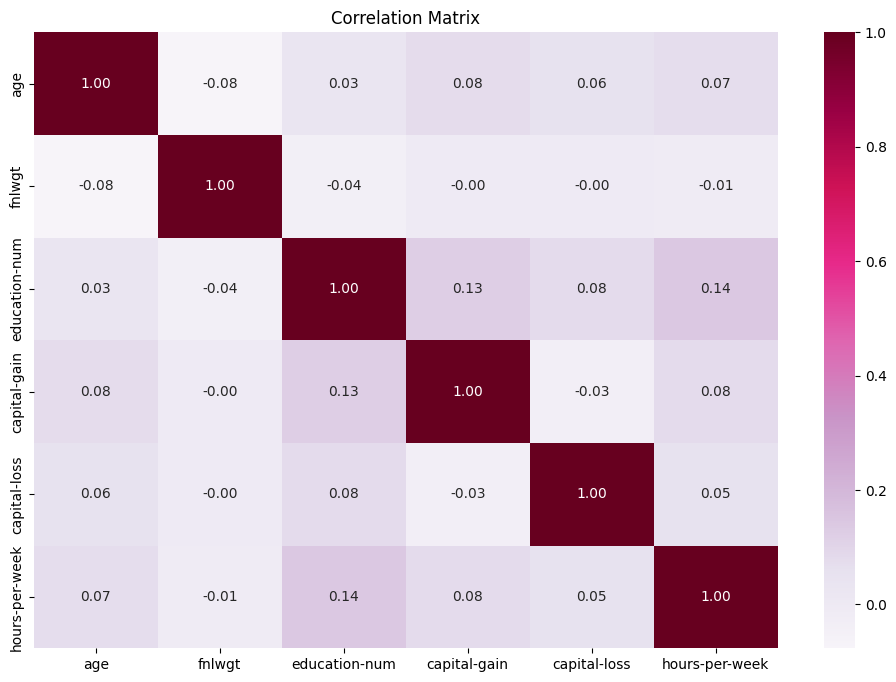

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


###**Recursive Feature Elimination (RFE)**

#### What is RFE?

Recursive Feature Elimination (RFE) is a feature selection technique used to identify the most significant features in a dataset. It works by recursively removing the least important features and building the model on the remaining features until the desired number of features is reached.

#### How does RFE work?

1. **Model Training**: An initial model is trained on the complete set of features.
2. **Feature Ranking**: The model assigns importance scores to each feature.
3. **Feature Elimination**: The least important feature(s) are removed from the dataset.
4. **Iteration**: The process is repeated with the reduced set of features.
5. **Selection**: The process continues recursively until the desired number of features is reached.

RFE can be used with various machine learning models, including linear regression, logistic regression, and support vector machines (SVMs).

#### Strengths of RFE

1. **Improves Model Performance**: By selecting the most important features, RFE can enhance the model's performance by reducing overfitting and improving generalization.
2. **Model Agnostic**: RFE can be used with any machine learning algorithm that provides a feature importance score, making it versatile.
3. **Feature Ranking**: RFE not only selects the best features but also provides a ranking of feature importance, offering insights into which features are most impactful.

#### Weaknesses of RFE

1. **Computationally Intensive**: RFE can be computationally expensive, especially with large datasets or a high number of features, as it involves training multiple models.
2. **Sensitive to Initial Model Choice**: The performance and selection of features can be sensitive to the choice of the initial model and its parameters.
3. **Risk of Removing Important Features**: There is a risk of eliminating important features in early iterations if the initial model's feature importance scores are not accurate.

RFE is a powerful tool for feature selection, especially when used in conjunction with a robust initial model. Its ability to recursively refine the feature set can lead to improved model performance and more interpretable models.




In [9]:
# Rename the 'class' column to 'income'
df.rename(columns={'class': 'income'}, inplace=True)
# Verify the renaming
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


####RFE Logistic Regression

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(max_iter=1000)

# Define RFE
rfe = RFE(model, n_features_to_select=5)

# Fit RFE
rfe = rfe.fit(df[numerical_features], df['income'])

# Print selected features
selected_features = numerical_features[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


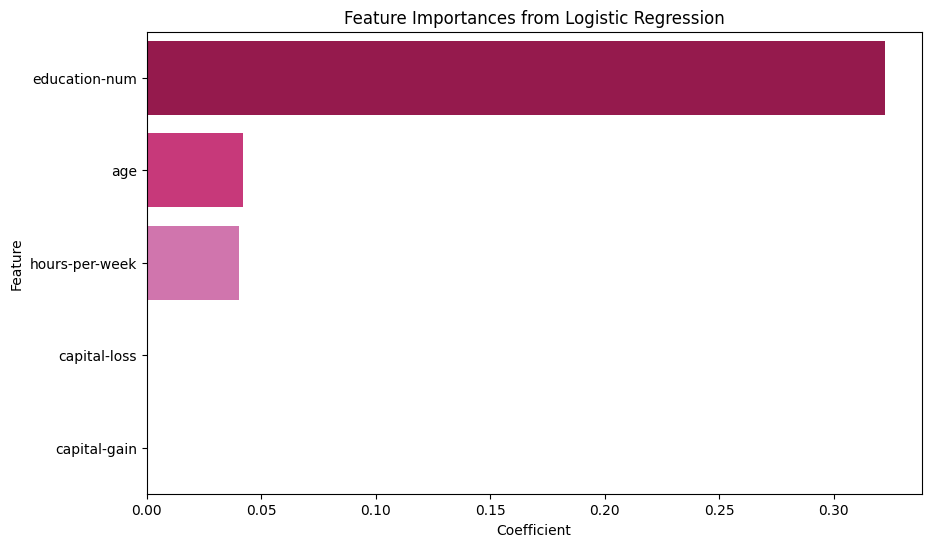

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_importances(rfe, selected_features, model_type, palette='PuRd_r'):
    """
    Plots the feature importances or coefficients of the selected features from the RFE model.

    Parameters:
    rfe (RFE): Fitted RFE model.
    selected_features (list): List of selected feature names.
    model_type (str): Type of the model used, e.g., 'Logistic Regression' or 'Random Forest'.
    palette (str): Color palette for the plot.
    """
    # Determine the appropriate attribute based on the model type
    if hasattr(rfe.estimator_, 'coef_'):
        # For linear models like Logistic Regression
        importances = rfe.estimator_.coef_[0]
        xlabel = 'Coefficient'
    elif hasattr(rfe.estimator_, 'feature_importances_'):
        # For ensemble models like Random Forest
        importances = rfe.estimator_.feature_importances_
        xlabel = 'Importance'
    else:
        raise ValueError("The model does not have 'coef_' or 'feature_importances_' attribute.")

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    })

    # Sort by importance values
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature' , palette=palette)
    plt.title(f'Feature Importances from {model_type}')
    plt.xlabel(xlabel)
    plt.ylabel('Feature')
    plt.show()

# Example usage for Logistic Regression
plot_feature_importances(rfe, selected_features, model_type='Logistic Regression')


####RFE Random Forest

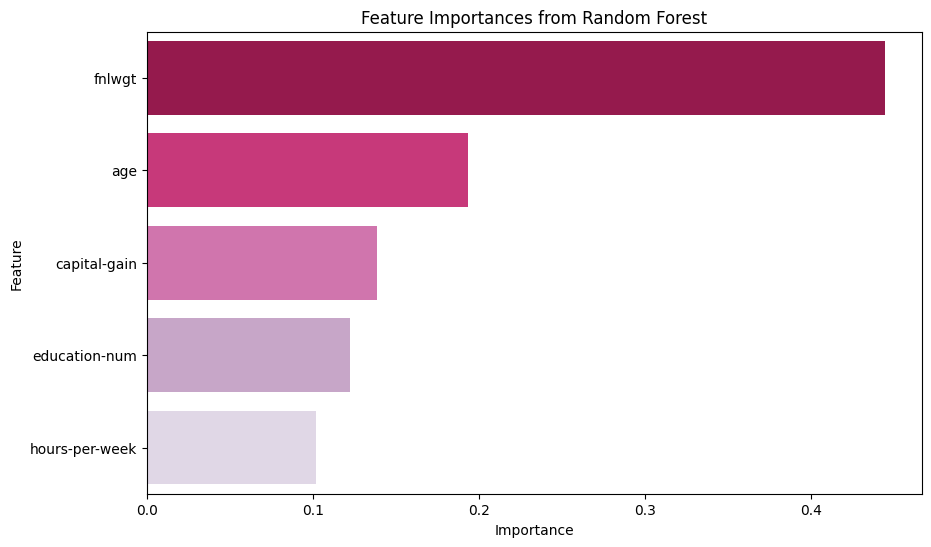

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define RFE
rfe = RFE(model, n_features_to_select=5)

# Fit RFE
rfe = rfe.fit(df[numerical_features], df['income'])

# Plot selected features
selected_features = numerical_features[rfe.support_]
plot_feature_importances(rfe, selected_features, model_type='Random Forest')

#### RFE Random Forest GridSearchCV

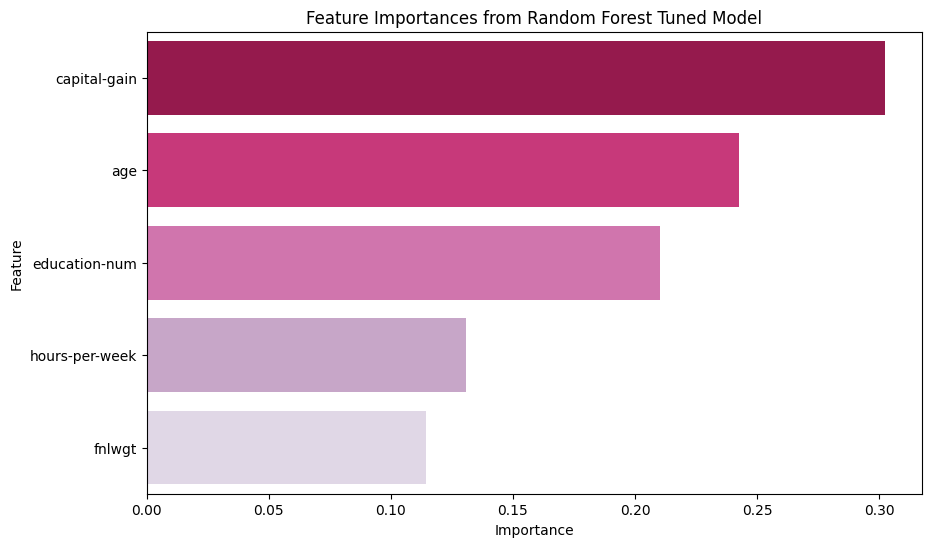

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Sample the dataset to make it run faster
dfs = df.sample(frac=0.1, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(dfs[numerical_features], dfs['income'])

# Get the best model
best_model = grid_search.best_estimator_

# Define RFE with the best model
rfe = RFE(best_model, n_features_to_select=5)

# Fit RFE
rfe = rfe.fit(dfs[numerical_features], dfs['income'])

# selected features
selected_features = numerical_features[rfe.support_]
plot_feature_importances(rfe, selected_features, model_type='Random Forest Tuned Model')


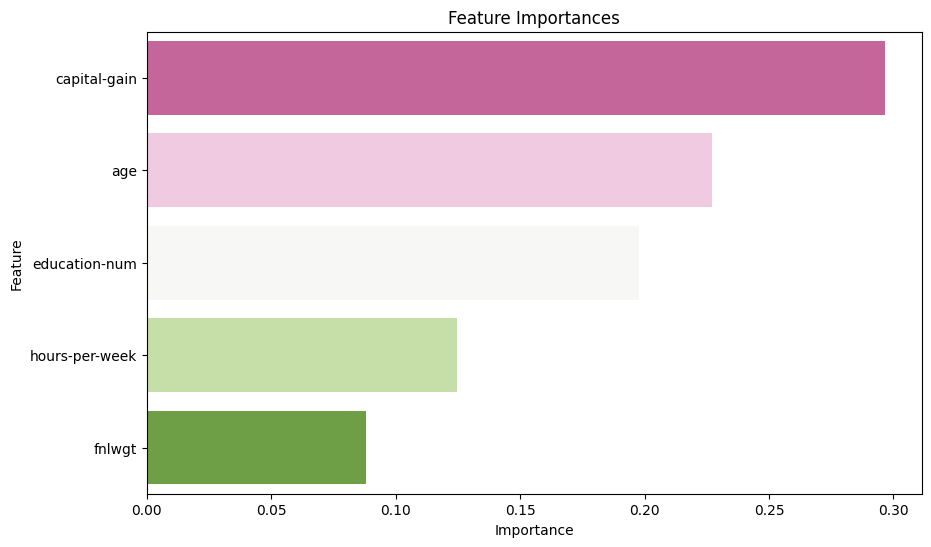

In [13]:
# Get selected features and their importances
selected_features = numerical_features[rfe.support_]
feature_importances = best_model.feature_importances_[rfe.support_]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='PiYG')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### RFE and Categorical Data

RFE and many other feature selection methods typically work with numerical data. Categorical data needs to be encoded into a numerical format before these methods can be applied. Here are the steps to handle this situation:

1. **Encode Categorical Variables**: Convert categorical features to numerical format using encoding techniques such as one-hot encoding or label encoding.
2. **Apply RFE**: Use the encoded data with RFE to select the most important features.

#### Encoding Categorical Variables & GridSearchCV

For the sake of demonstration, I'll use one-hot encoding to convert categorical features into a numerical format. Then, we'll apply RFE. By encoding categorical variables, you can successfully apply RFE to select the most important features from both numerical and categorical data.


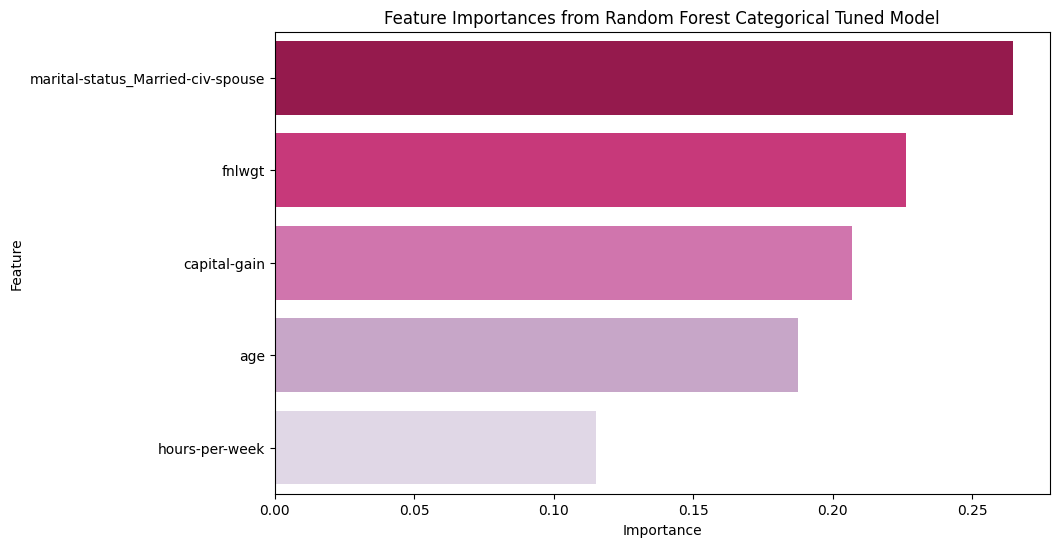

In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(dfs, drop_first=True)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(df_encoded.drop(columns='income_>50K'), df_encoded['income_>50K'])

# Get the best model
best_model = grid_search.best_estimator_

# Define RFE with the best model
rfe = RFE(best_model, n_features_to_select=5)

# Fit RFE
rfe = rfe.fit(df_encoded.drop(columns='income_>50K'), df_encoded['income_>50K'])

# Print selected features
selected_features = df_encoded.drop(columns='income_>50K').columns[rfe.support_]
plot_feature_importances(rfe, selected_features, model_type='Random Forest Categorical Tuned Model')


#### Encoding Categorical Variables

#### **One-hot Encoding**

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Display the first few rows of the encoded features
print(df_encoded.head())

####**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the first few rows of the encoded features
print(df[categorical_features].head())

## Additional Techniques

1. **Handling Imbalanced Data**:
   - **Resampling Techniques**: Oversampling (e.g., SMOTE) or undersampling to balance class distributions.
   - **Synthetic Data Generation**: Use techniques like SMOTE to create synthetic samples for minority classes.

2. **Feature Interaction**:
   - **Interaction Terms**: Create features that capture interactions between existing features. For example, `age * hours-per-week`.

3. **Feature Extraction from Dates**:
   - If you have date features, extract useful components like year, month, day, day of the week, etc.

4. **Text Data Processing**:
   - For text data, consider techniques like TF-IDF, word embeddings, or bag-of-words.

5. **Dimensionality Reduction**:
   - **Principal Component Analysis (PCA)**: Reduce the number of features while retaining most of the variance.
   - **t-SNE**: For visualization of high-dimensional data.

6. **Polynomial Features**:
   - Create polynomial features to capture non-linear relationships between features.

### Example Code for Additional Techniques

#### Handling Imbalanced Data

```python
from imblearn.over_sampling import SMOTE

# Define the feature matrix and target vector
X = df_encoded.drop(columns='income_>50K')
y = df_encoded['income_>50K']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame for consistency
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['income_>50K'] = y_resampled
```

#### Feature Interaction

```python
# Create interaction term
df_encoded['age_hours_per_week'] = df_encoded['age'] * df_encoded['hours-per-week']
```

#### Feature Extraction from Dates

```python
# Assume 'date_column' is a column with datetime values
df_encoded['year'] = df_encoded['date_column'].dt.year
df_encoded['month'] = df_encoded['date_column'].dt.month
df_encoded['day'] = df_encoded['date_column'].dt.day
df_encoded['day_of_week'] = df_encoded['date_column'].dt.dayofweek
```

#### Polynomial Features

```python
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_encoded[numerical_features])

# Convert to DataFrame
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))
```

#### Dimensionality Reduction with PCA

```python
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_encoded.drop(columns='income_>50K'))

# Convert to DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(5)])
pca_df['income_>50K'] = df_encoded['income_>50K'].values
```

### Considerations

1. **Domain Knowledge**: Use domain knowledge to create meaningful features.
2. **Feature Scaling**: While Random Forest does not require scaling, other models (e.g., SVM, k-NN) might.
3. **Cross-Validation**: Ensure to evaluate the impact of new features using cross-validation.
4. **Feature Importance**: Continuously monitor feature importances to avoid overfitting.


Incorporating these additional techniques and considerations will provide a comprehensive and robust feature engineering process for your machine learning tasks.

###PCA

In [25]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_encoded.drop(columns='income_>50K'))

# Convert to DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(5)])
pca_df['income_>50K'] = df_encoded['income_>50K'].values

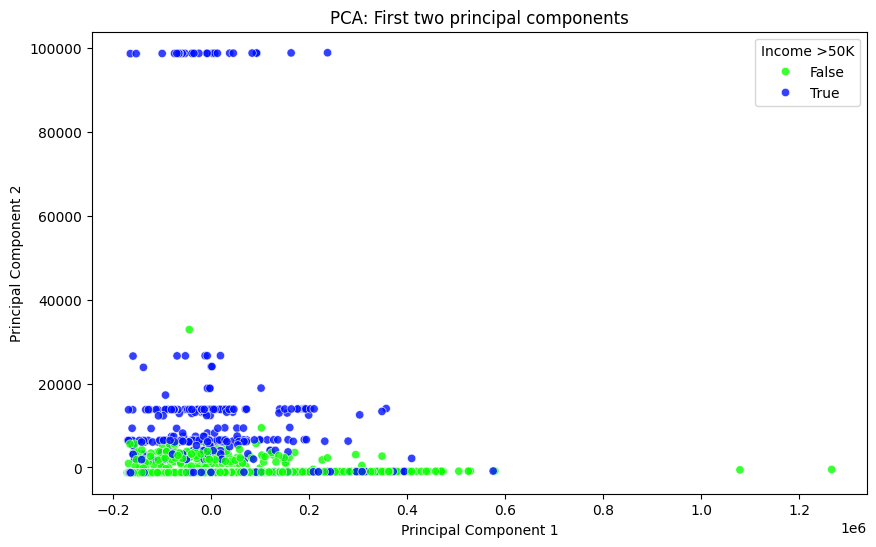

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='income_>50K',
    palette=sns.color_palette("hsv", 2),
    data=pca_df,
    alpha=0.8
)
plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Income >50K')
plt.show()
